In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from pingouin import multivariate_normality
import matplotlib.pyplot as plt
import scipy.stats as stats 
import seaborn as sns

C:\Users\berke\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Veri Setini Yükleme

In [42]:
df = pd.read_csv("imünoterapi2015.csv", sep=";")

In [43]:
df.head()

,Yas,Zaman,TumorSayisi,Bolge,Endurasyon,Cinsiyet,Tur1,Tur2,Tur3,Tedavi
0,19,2,2,60,7,1,1,0,0,1
1,16,11,2,100,25,0,1,0,0,1
2,15,2,10,70,21,1,0,0,1,1
3,32,12,9,43,50,0,1,0,0,0
4,15,8,12,30,28,1,1,0,0,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Yas          90 non-null     int64
 1   Zaman        90 non-null     int64
 2   TumorSayisi  90 non-null     int64
 3   Bolge        90 non-null     int64
 4   Endurasyon   90 non-null     int64
 5   Cinsiyet     90 non-null     int64
 6   Tur1         90 non-null     int64
 7   Tur2         90 non-null     int64
 8   Tur3         90 non-null     int64
 9   Tedavi       90 non-null     int64
dtypes: int64(10)
memory usage: 7.2 KB


In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Yas,90.0,27.944444,9.551000,15.0,20.0,27.0,35.00,48.0
Zaman,90.0,8.055556,2.678928,2.0,6.0,8.0,10.75,12.0
TumorSayisi,90.0,5.244444,2.969172,1.0,3.0,5.0,8.00,12.0
Bolge,90.0,56.511111,29.640257,6.0,30.5,60.0,80.00,100.0
Endurasyon,90.0,20.022222,17.038606,2.0,7.0,11.0,30.00,62.0
Cinsiyet,90.0,0.511111,0.502677,0.0,0.0,1.0,1.00,1.0
Tur1,90.0,0.577778,0.496681,0.0,0.0,1.0,1.00,1.0
Tur2,90.0,0.177778,0.384467,0.0,0.0,0.0,0.00,1.0
Tur3,90.0,0.244444,0.432165,0.0,0.0,0.0,0.00,1.0
Tedavi,90.0,0.688889,0.465542,0.0,0.0,1.0,1.00,1.0


## Çoklu Doğrusallık

In [47]:
# Korelasyon
df.corr().round(2)

,Yas,Zaman,TumorSayisi,Bolge,Endurasyon,Cinsiyet,Tur1,Tur2,Tur3,Tedavi
Yas,1.00,0.39,0.12,0.11,-0.05,-0.04,-0.21,0.31,-0.03,-0.31
Zaman,0.39,1.00,-0.07,0.00,-0.04,0.05,-0.16,0.22,-0.01,-0.63
TumorSayisi,0.12,-0.07,1.00,0.11,0.07,-0.02,-0.10,0.05,0.07,-0.01
Bolge,0.11,0.00,0.11,1.00,0.22,-0.04,-0.12,-0.15,0.27,-0.16
Endurasyon,-0.05,-0.04,0.07,0.22,1.00,0.07,0.01,-0.05,0.03,-0.21
Cinsiyet,-0.04,0.05,-0.02,-0.04,0.07,1.00,-0.07,-0.01,0.09,-0.18
Tur1,-0.21,-0.16,-0.10,-0.12,0.01,-0.07,1.00,-0.54,-0.67,0.20
Tur2,0.31,0.22,0.05,-0.15,-0.05,-0.01,-0.54,1.00,-0.26,0.06
Tur3,-0.03,-0.01,0.07,0.27,0.03,0.09,-0.67,-0.26,1.00,-0.29
Tedavi,-0.31,-0.63,-0.01,-0.16,-0.21,-0.18,0.20,0.06,-0.29,1.00


## VIF Değerleri

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df.drop(["Tedavi"], axis=1)
y = df["Tedavi"]

In [49]:
#vif
vif = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X.columns).T

,Yas,Zaman,TumorSayisi,Bolge,Endurasyon,Cinsiyet,Tur1,Tur2,Tur3
vif,1.329938,1.225099,1.048634,1.190891,1.070404,1.027049,12.187822,5.726013,6.760243


VIF > 10 olan Tur1 değişkeni veri setinden çıkarıldıktan sonraki VIF değerleri:

In [50]:
X = df.drop(["Tedavi", "Tur1"], axis=1)
y = df["Tedavi"]
vif = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X.columns).T

,Yas,Zaman,TumorSayisi,Bolge,Endurasyon,Cinsiyet,Tur2,Tur3
vif,11.214997,9.480592,3.883373,5.187772,2.473877,2.006987,1.485456,1.539714


VIF > 10 olan Zaman değişkeni veri setinden çıkarıldıktan sonraki VIF değerleri:

In [51]:
X = df.drop(["Tedavi", "Tur1", "Zaman"], axis=1)
y = df["Tedavi"]
vif = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X.columns).T

,Yas,TumorSayisi,Bolge,Endurasyon,Cinsiyet,Tur2,Tur3
vif,6.432108,3.875535,5.091789,2.452349,1.924388,1.476623,1.537665


Kalan değişkenlere bakıldığında çoklu doğrusallık sorunun olmadığı söyleyenebilir.

## Değişken Dağılımları

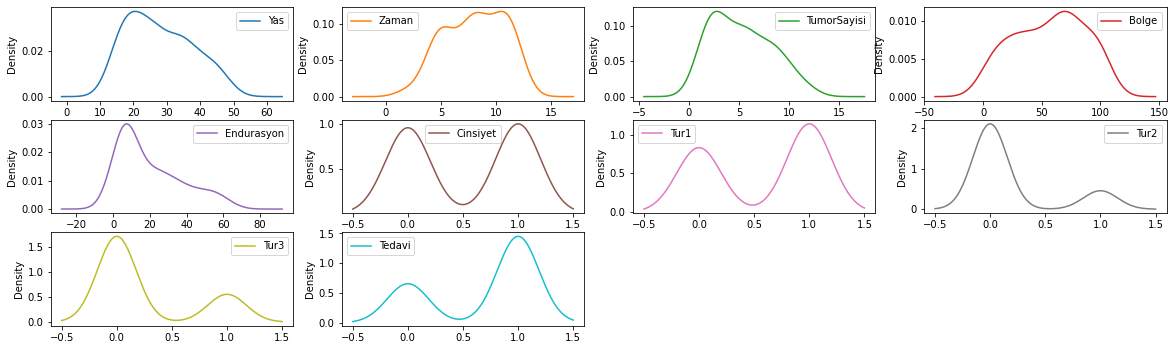

In [52]:
df.plot(kind='density', subplots=True, layout=(5,4), sharex=False, figsize=(20, 10))
plt.show()

## Çoklu Normallik Varsayımı

In [54]:
multivariate_normality(X, alpha=.05)

HZResults(hz=17.785094377702993, pval=0.0, normal=False)

p=0.00 olması sebebiyle H0 red, %95 güvenilirlikle bağımlı değişken normal dağılıma uygun değildir.

In [19]:
print(stats.normaltest(df["target"]))

NormaltestResult(statistic=3359.1808716741552, pvalue=0.0)


p=0.00 olması sebebiyle H0 red, %95 güvenilirlikle bağımlı değişken normal dağılıma uygun değildir.

## Kovaryans Matrislerinin Eşitliği

In [84]:
cov = statistic, p_value = stats.levene(df["Cinsiyet"], df["Yas"], df['TumorSayisi'], df['Bolge'], 
                                        df['Endurasyon'], df['Tur2'],df['Tur3'], center="mean")
print(cov)

LeveneResult(statistic=169.1510623517462, pvalue=3.2212011380164975e-127)


p değeri > 0.05 olduğundan kovaryans matrisleri eşittir. 

## Diskriminant Analizi

In [85]:
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [86]:
#diskriminant modeli
model = LinearDiscriminantAnalysis(store_covariance=True)
model.fit(X, y)

LinearDiscriminantAnalysis(store_covariance=True)

## Doğruluk Değeri

In [87]:
model.score(X,y)

0.8

## Model Katsayıları

In [89]:
model.coef_

array([[-1.11974252e-01,  5.75752633e-02, -4.91624143e-04,
        -3.47669024e-02, -8.72863388e-01,  7.09281440e-01,
        -1.71279027e+00]])

## Başarılı tedavi ve Başarısız tedavi için ortalama değerler

In [94]:
model.means_

array([[32.32142857,  5.28571429, 63.60714286, 25.21428571,  0.64285714,
         0.14285714,  0.42857143],
       [25.96774194,  5.22580645, 53.30645161, 17.67741935,  0.4516129 ,
         0.19354839,  0.16129032]])

## Diskriminant Grafiği

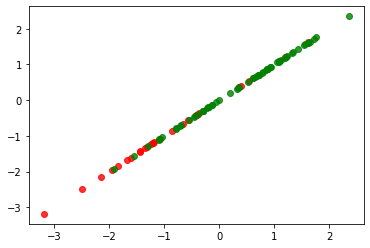

In [98]:
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = df.Tedavi
plt.figure()
colors = ['red', 'green']
lw = 2
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 0], alpha=.8, color=color,
                label=target_names)

#display LDA plot
plt.show()